In [1]:
# Importando bibliotecas que serão usadas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [2]:
# Criando uma DataFrame vazia para alocarmos valores dentro dela depois
VVAR3 = pd.DataFrame()

# Função DataReader (que pertence ao escopo de 'wb') para buscar dados no Yahoo Finance
VVAR3['Price'] = wb.DataReader('VVAR3.SA',                   # Nome do código da ação
                               data_source='yahoo',          # Onde vamos pegar este dado
                               start='1-1-2015')['Adj Close']# Data de início e coluna específica 

# Mostrando as 5 últimas linhas da DataFrame
VVAR3.tail()

,Price
2020-10-19,19.230000
2020-10-20,19.920000
2020-10-21,20.129999
2020-10-22,20.170000
2020-10-23,20.290001


In [3]:
# Como calcularíamos o retorno 'na mão'?
fechamento_01 = 16.96
fechamento_02 = 17.29

# Aplicando a fórmula do retorno.
r = (fechamento_02-fechamento_01)/fechamento_01

# Resultado de 'r'.
print(r*100)

1.945754716981122


In [4]:
# Calculando os retornos a partir da coluna 'Price' que definimos anteriormente
VVAR3_returns= VVAR3['Price'].pct_change()  # Calcula a variação percentual de cada preço
                                            # em relação ao anterior

# 'Jogamos fora' todos NaN values
VVAR3_returns.dropna(inplace=True)

VVAR3_returns.tail()

2020-10-19   -0.003627
2020-10-20    0.035881
2020-10-21    0.010542
2020-10-22    0.001987
2020-10-23    0.005949
Name: Price, dtype: float64

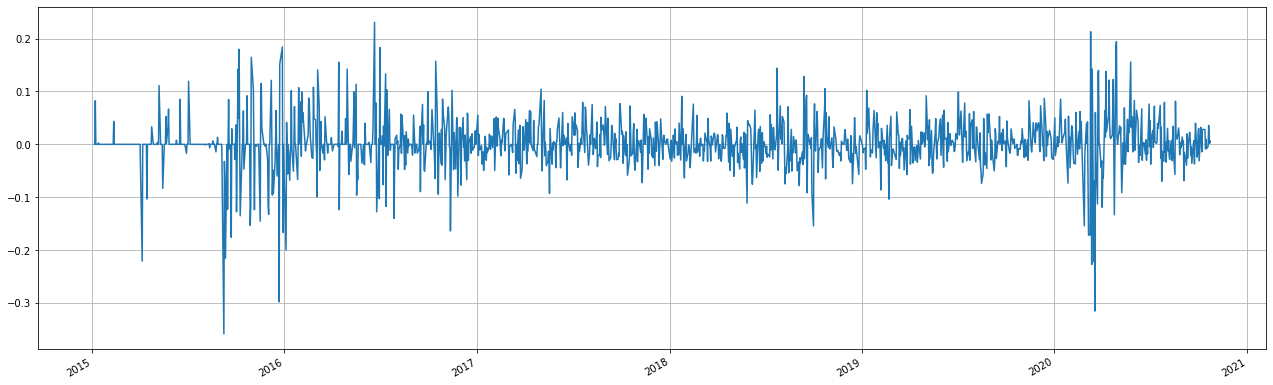

In [5]:
# Como se diz por aí: 'um gráfico vale mais que mil palavras'.
VVAR3_returns.plot(grid=True, figsize=(22,7))

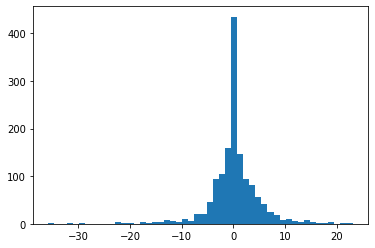

O maior retorno que a VVAR3 obteve nos últimos cinco anos foi de: 23.076932298776608 
O menor retorno que a VVAR3 obteve nos últimos cinco anos foi de: -35.844147673635995


In [6]:
# Você pode usar o histograma para mostrar a densidade histórica ou frequência de um determinado intervalo de retornos.
percent_returns = VVAR3_returns*100
plt.hist(percent_returns, bins= 50) # Definindo o número de 'caixas'  
plt.show()

# Mostrando os máximos e mínimos dos retornos
print('O maior retorno que a VVAR3 obteve nos últimos cinco anos foi de:',
      VVAR3_returns.max()*100,'\n'+
      'O menor retorno que a VVAR3 obteve nos últimos cinco anos foi de:',
      VVAR3_returns.min()*100)  


In [7]:
# Calcula-se o total de retorno no período considerado.  
cum_returnVVAR3 = (1+VVAR3_returns).prod() # Produto  

# Calcula-se o número de dias úteis que nossos dados abrange que, na prática, é o número de linhas que temos.
days_VVAR3 = VVAR3_returns.shape[0]   #(nº de linhas, nº de colunas), onde (0,1)

# Para anualizar estes retornos, divide-se o número de dias úteis pelo número de dias que estamos trabalhando.
annualized_VVAR3 = cum_returnVVAR3**(252/days_VVAR3) - 1
print('O retorno anualizado da VVAR3 é de:', (annualized_VVAR3*100).round(2), '%')

O retorno anualizado da VVAR3 é de: 21.85 %


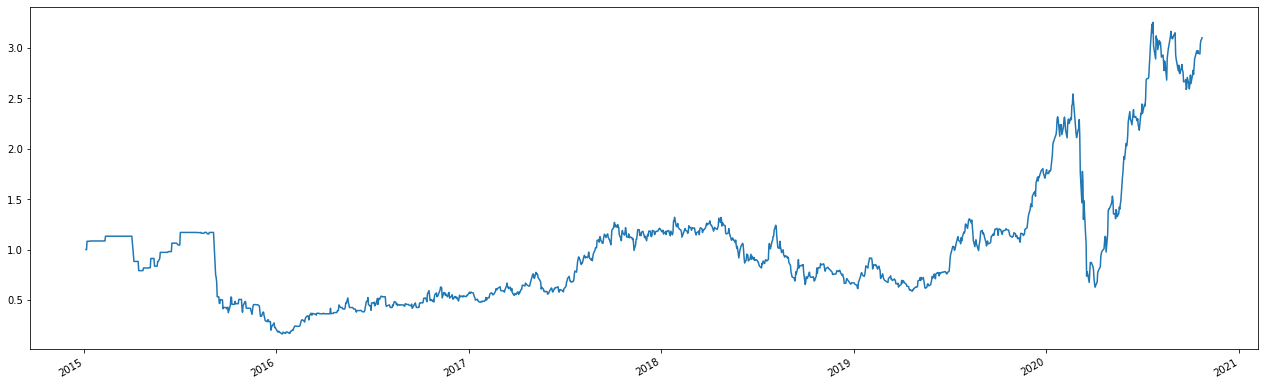

In [8]:
# Valor acumulado ao decorrer do tempo.
cum_daily_VVAR3 = (1+VVAR3_returns).cumprod() # Produto acumulado
cum_daily_VVAR3.plot(figsize=(22,7))

In [9]:
# Criando uma DataFrame vazia para alocarmos valores dentro dela depois
BTOW3 = pd.DataFrame()

# Função DataReader (que pertence ao escopo de 'wb') para buscar dados no Yahoo Finance
BTOW3['Price'] = wb.DataReader('BTOW3.SA', data_source='yahoo', start='1-1-2015')['Adj Close']

# Calculando os retornos
BTOW3_returns= BTOW3['Price'].pct_change()

# 'Jogamos fora' todos NaN values
BTOW3_returns.dropna(inplace=True)

BTOW3_returns.tail() 

2020-10-19   -0.035206
2020-10-20    0.000444
2020-10-21   -0.011641
2020-10-22   -0.022995
2020-10-23   -0.004592
Name: Price, dtype: float64

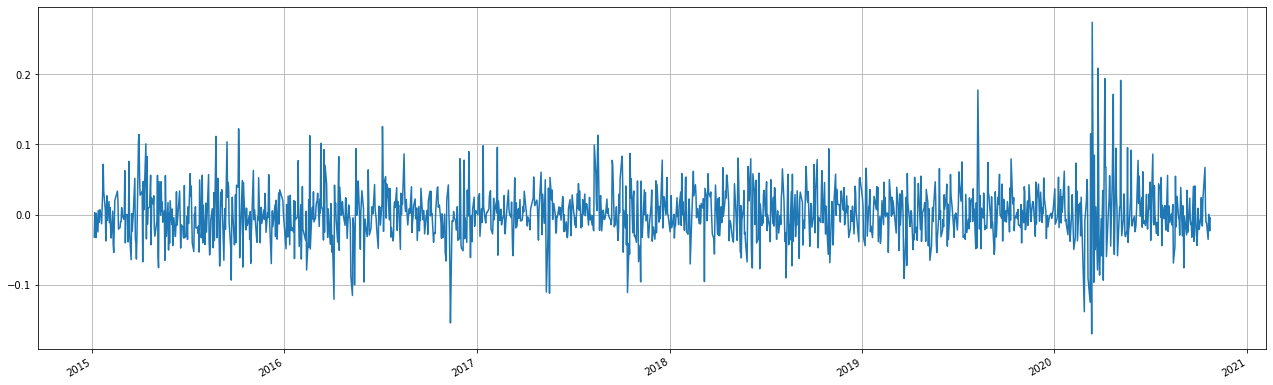

In [10]:
BTOW3_returns.plot(grid=True, figsize=(22,7))

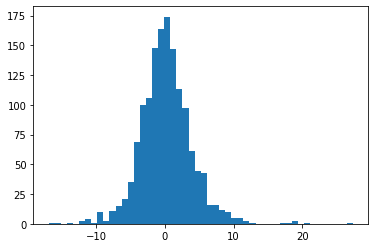

O maior retorno que a BTOW3 obteve nos últimos cinco anos foi de: 27.395345998364817 
O menor retorno que a BTOW3 obteve nos últimos cinco anos foi de: -16.972389959722868


In [11]:
# Você pode usar o histograma para mostrar a densidade histórica ou frequência de um determinado intervalo de retornos.
percent_returns = BTOW3_returns*100 # Tranformando os retornos em porcentagem
plt.hist(percent_returns, bins= 50)
plt.show()                          # Plota o gráfico na tela

# Mostrando os máximos e mínimos dos retornos
print('O maior retorno que a BTOW3 obteve nos últimos cinco anos foi de:',
     BTOW3_returns.max()*100,'\n'+
      'O menor retorno que a BTOW3 obteve nos últimos cinco anos foi de:',
      BTOW3_returns.min()*100)  

In [12]:
# Calcula-se o total de retorno no período considerado.
total_returnBTOW3 = (1+BTOW3_returns).prod()

# Calcula-se o número de dias considerada, que na prática é a quantidade de linhas de nossa tabela.
days_BTOW3 = BTOW3_returns.shape[0]

# Para anualizar estes retornos, divide-se o número de dias úteis pelo número de dias que estamos trabalhando.
annualized_BTOW3 = total_returnBTOW3**(252/days_BTOW3)- 1
print('O retorno anualizado da BTOW3 é de:', (annualized_BTOW3*100).round(2), '%')  

O retorno anualizado da BTOW3 é de: 27.95 %


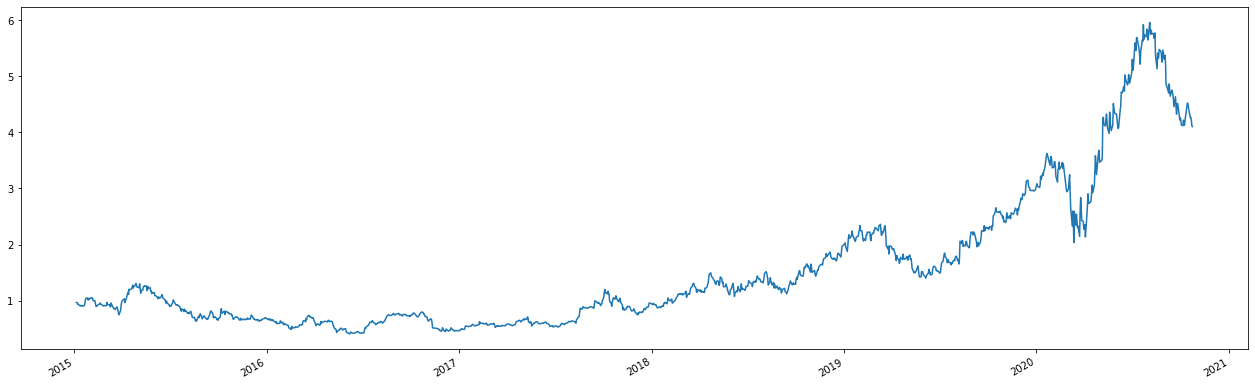

In [13]:
# Valor acumulado ao decorrer do tempo.
cum_daily_BTOW3 = (1+BTOW3_returns).cumprod()
cum_daily_BTOW3.plot(figsize=(22,7))

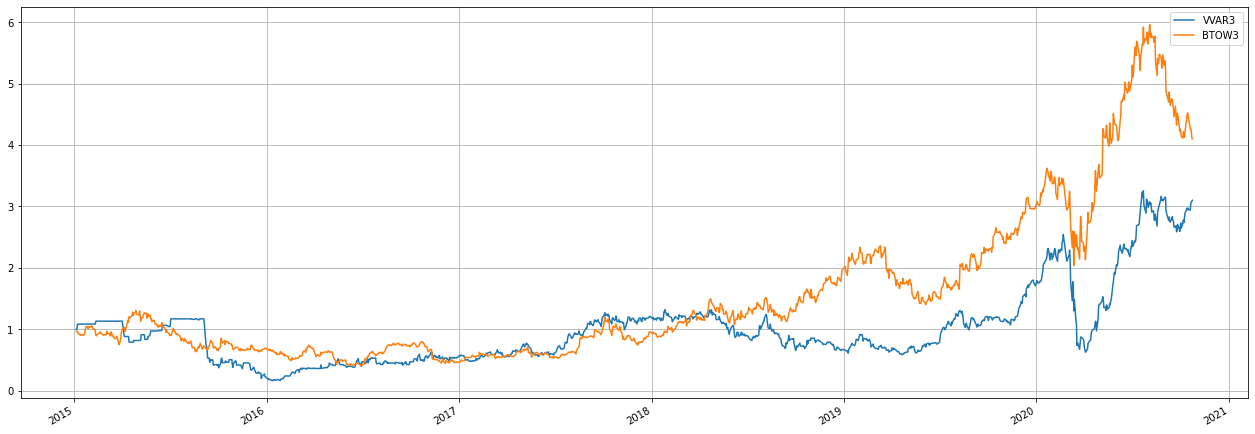

In [14]:
# Concatenando os retornos acumulados diariamente das duas ações
mini_carteira = pd.merge(cum_daily_VVAR3, cum_daily_BTOW3, left_index= True, right_index=True)

# Mudando o nome das colunas 
mini_carteira = mini_carteira.rename(columns= {'Price_x':'VVAR3', 'Price_y':'BTOW3'}, inplace=False)

# Plotando o gráfico
mini_carteira.plot(figsize=(22,8), grid=True)

In [15]:
# Calculando a volatilidade através do desvio padrão
vol_VVAR3= VVAR3_returns.std()   # standard deviation - desvio padrão
vol_BTOW3= BTOW3_returns.std()

print('Volatilidade VVAR3:', vol_VVAR3, 
      '\n'+'Volatilidade BTOW3:', vol_BTOW3)


Volatilidade VVAR3: 0.04726523049125367 
Volatilidade BTOW3: 0.03810891875588665


In [16]:
# Volatilidade anualizada
annualized_vol_VVAR3 = vol_VVAR3*np.sqrt(252) # np.sqrt calcula a raiz quadrada de um número
annualized_vol_BTOW3 = vol_BTOW3*np.sqrt(252) 

print('Volatilidade VVAR3 anualizada:', annualized_vol_VVAR3,
      '\n'+'Volatilidade BTOW3 anualizada:', annualized_vol_BTOW3)

Volatilidade VVAR3 anualizada: 0.7503122732400268 
Volatilidade BTOW3 anualizada: 0.6049603305698464


In [17]:
# Define-se a taxa livre de risco (Selic)
rf = 0.02

# Aplica-se a fórmula passada anteriormente
VVAR3_sharpe = (annualized_VVAR3 - rf)/annualized_vol_VVAR3
BTOW3_sharpe = (annualized_BTOW3 - rf)/annualized_vol_BTOW3

print('Sharpe ratio da VVAR3:', VVAR3_sharpe,
     '\n'+'Sharpe ratio da BTOW3:', BTOW3_sharpe)

Sharpe ratio da VVAR3: 0.2645662501672823 
Sharpe ratio da BTOW3: 0.4289323398348475


In [18]:
# Definindo uma função que recebe uma série de retornos e retorna o downside risk.
def downside_risk(r):  
    """
    Retorna o desvio negativo de uma série de dados.
    """                         
    is_negative = r < 0                  # Atribuindo a variavel 'is_negative', em forma de True e False    
    semideviation = r[is_negative].std() # Identificando os desvios negativos como True e calculando o desvio padrão
                                         
    return semideviation                 

In [19]:
# Utilizando a função e anualizando o downside risk da mesma maneira que fazemos com a volatilidade
semidev_VVAR3= downside_risk(VVAR3_returns)*(252**0.5) # Anualizando
semidev_BTOW3= downside_risk(BTOW3_returns)*(252**0.5)

print('Semideviation da VVAR3 é de:', semidev_VVAR3,
     '\n'+'Semideviation da BTOW3 é de:', semidev_BTOW3)

Semideviation da VVAR3 é de: 0.6639429262894327 
Semideviation da BTOW3 é de: 0.36500415170814593


In [20]:
# Define-se a taxa livre de risco na variável 'rf' 
rf = 0.06

# Aplicação na fórmula
sortino_VVAR3 = (annualized_VVAR3 - rf)/(semidev_VVAR3)
sortino_BTOW3 = (annualized_BTOW3 - rf)/(semidev_BTOW3)

print('Sortino Ratio - VVAR3:', sortino_VVAR3,
     '\n'+ 'Sortino Ratio - BTOW3:', sortino_BTOW3)

Sortino Ratio - VVAR3: 0.23873634059398816 
Sortino Ratio - BTOW3: 0.6013275440058199


In [21]:
# Criando uma função para o cálculo do VaR.
def historical_var(r,level=95): # A função recebe como argumentos, respectivamente, uma série de retornos (r) e 
                                # um nível de confiança especificado de confiança(level), que como default é 95.
    """
    Retorna o VaR histórico a um nível específicado de confiança.
    """
    var = np.percentile(r, 100-level)  # 'np.percentile' encontra o último percentil no eixo X da distribuição no intervalo
                                       # de confiança de 95%
    return var

In [22]:
# Calculando o Var(95) dos retornos
var_VVAR3 = historical_var(VVAR3_returns)
var_BTOW3 = historical_var(BTOW3_returns)

print('O VaR(95) para VVAR3 é igual a:', var_VVAR3,
    '\n'+'O VaR(95) para BTOW3 é igual a:', var_BTOW3)

O VaR(95) para VVAR3 é igual a: -0.06389265998512214 
O VaR(95) para BTOW3 é igual a: -0.05355336426879004


In [23]:
# CVaR 95 histórico
cvar_VVAR3 = VVAR3_returns[VVAR3_returns <= var_VVAR3].mean()  # média dos retornos que estão abaixo do VaR
cvar_BTOW3 = BTOW3_returns[BTOW3_returns <= var_BTOW3].mean()

print('O CVaR(95) para VVAR3 é igual a:', cvar_VVAR3,
     '\n'+'O CVaR(95) para BTOW3 é igual a:', cvar_BTOW3)

O CVaR(95) para VVAR3 é igual a: -0.11835349690416629 
O CVaR(95) para BTOW3 é igual a: -0.07763055749965166


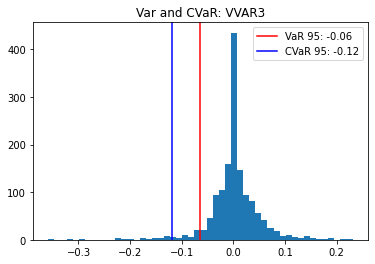

In [24]:
# Ordenando os retornos para plotagem
retornos_ordenadosVVAR3 = sorted(VVAR3_returns)

# Plotando a probabilidade de cada quantil de retorno
plt.hist(retornos_ordenadosVVAR3, bins= 50)

# Indicando os quantis de VaR 95 e CVaR 95
plt.axvline(x=var_VVAR3, color="r", linestyle="-", label='VaR 95: {0:.2f}'.format(var_VVAR3))
plt.axvline(x=cvar_VVAR3, color='b', linestyle='-', label='CVaR 95: {0:.2f}'.format(cvar_VVAR3))
plt.title('Var and CVaR: VVAR3')
plt.legend()
plt.show()

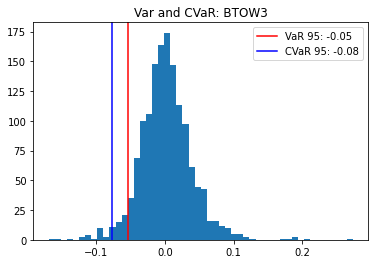

In [25]:
# Ordenando os retornos para plotagem
retornos_ordenadosBTOW3 = sorted(BTOW3_returns)

# Plotando a probabilidade de cada quantil de retorno
plt.hist(retornos_ordenadosBTOW3, bins=50)

# Indicando os quantis de VaR 95 e CVaR 95
plt.axvline(x=var_BTOW3, color="r", linestyle="-", label='VaR 95: {0:.2f}'.format(var_BTOW3))
plt.axvline(x=cvar_BTOW3, color='b', linestyle='-', label='CVaR 95: {0:.2f}'.format(cvar_BTOW3))
plt.title('Var and CVaR: BTOW3')
plt.legend()
plt.show()

In [26]:
data = {'Annualized Return':  [annualized_VVAR3, annualized_BTOW3],
        'Max': [max(VVAR3_returns), max(BTOW3_returns)],
        'Min':[min(VVAR3_returns), min(BTOW3_returns) ],
        'Volatilty':[vol_VVAR3, vol_BTOW3],
        'Annualized Volatility':[annualized_vol_VVAR3,annualized_vol_BTOW3],
        'Sharpe Ratio': [VVAR3_sharpe, BTOW3_sharpe],
        'Downside Risk':[semidev_VVAR3, semidev_BTOW3],
        'Sortino Ratio':[sortino_VVAR3, sortino_BTOW3],
        'VaR(95)': [var_VVAR3, var_BTOW3],
        'CVaR(95)':[cvar_VVAR3, cvar_BTOW3]
        }

df = pd.DataFrame (data, columns = ['Annualized Return',
                                    'Max',
                                    'Min',
                                    'Volatilty', 
                                    'Annualized Volatility',
                                    'Sharpe Ratio',
                                    'Downside Risk',
                                    'Sortino Ratio',
                                    'VaR(95)',
                                    'CVaR(95)'], index=['VVAR3', 'BTOW3'])

display(df.round(3))

,Annualized Return,Max,Min,Volatilty,Annualized Volatility,Sharpe Ratio,Downside Risk,Sortino Ratio,VaR(95),CVaR(95)
VVAR3,0.219,0.231,-0.358,0.047,0.750,0.265,0.664,0.239,-0.064,-0.118
BTOW3,0.279,0.274,-0.170,0.038,0.605,0.429,0.365,0.601,-0.054,-0.078
